## Round 2

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
# Creating the initial dataframe
df = pd.read_csv('./marketing_customer_analysis.csv')
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


1. Show the dataframe shape

In [3]:
df.shape

(10910, 26)

2. Standardize the header names

In [4]:
# inspect the header names
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
# drop the index column
df=df.drop(['Unnamed: 0'], axis=1) 

In [6]:
# we have to convert it so snake format
cols = []
for column in df.columns:
    cols.append(column.lower())
df.columns = cols

In [7]:
# check if it worked
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [8]:
# replace spaces with _
cols = []
for column in df.columns:
    cols.append(column.replace(' ','_'))
df.columns = cols

In [9]:
# check if it worked
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

3. Which columns are numerical?

In [10]:
df.select_dtypes(['int32', 'float64'])
# df.select_dtypes(number)

,customer_lifetime_value,months_since_last_claim,number_of_open_complaints,total_claim_amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


4. Which columns are categorical?

In [11]:
df.select_dtypes(['object'])
# df.select_dtypes(object)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


5. Check and deal with NaN values

In [12]:
# Checking for NaN values
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [13]:
# We drop the rows where we have NaN for responses, because otherwise later we cant translate it to
# numericals for our later analysis
# Inserting the mode would tip the balance heavily into one direction
df = df[df['response'].isna()==False] 

In [14]:
df.isna().sum()

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           591
months_since_policy_inception       0
number_of_open_complaints         591
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     591
vehicle_size                      591
vehicle_type                     5164
dtype: int64

In [15]:
# For vehicle_type we have a value A, we assume it stands for "automatic transmission" and fill the NAN with M for "manual transmission"
df['vehicle_type'] = df['vehicle_type'].fillna('M')

In [16]:
df.isna().sum()

customer                           0
state                              0
customer_lifetime_value            0
response                           0
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          591
months_since_policy_inception      0
number_of_open_complaints        591
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                    591
vehicle_size                     591
vehicle_type                       0
dtype: int64

In [17]:
# Vehicle class and vehicle size aren't known in the same rows, we cant extrapolate anything and add anew category "unknown_size""unknown_class
df['vehicle_class'] = df['vehicle_class'].fillna('unknown_class')
df['vehicle_size'] = df['vehicle_size'].fillna('unknown_size')
df.isna().sum()

customer                           0
state                              0
customer_lifetime_value            0
response                           0
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          591
months_since_policy_inception      0
number_of_open_complaints        591
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                      0
vehicle_size                       0
vehicle_type                       0
dtype: int64

In [18]:
# For 'number_of_open_complaints' we fill with the mode because nearly 80% have 0.0 open complaints
df['number_of_open_complaints'].value_counts()

0.0    7695
1.0    1076
2.0     392
3.0     304
4.0     161
5.0      60
Name: number_of_open_complaints, dtype: int64

In [19]:
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(0.0)

In [20]:
# For 'months_since_last_claim' we fill with the mean
df['months_since_last_claim'].value_counts()
mslc= df['months_since_last_claim'].mean()
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(mslc)

In [21]:
# All NULL values are dealt with
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [22]:
# Extract the month into a new column
import time
from datetime import date

In [23]:
df['month'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

In [24]:
df['month'] = pd.DatetimeIndex(df['month']).month
#df['month'] = pd.DatetimeIndex(df['month']).dt.month

In [25]:
df['month'].unique()

array([2, 1], dtype=int64)

In [26]:
# There is already just data for january and february in the source file

## Round 3

In [27]:
# 1. Show DataFrame info

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10279 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10279 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10279 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10279 non-null  object 
 5   education                      10279 non-null  object 
 6   effective_to_date              10279 non-null  object 
 7   employmentstatus               10279 non-null  object 
 8   gender                         10279 non-null  object 
 9   income                         10279 non-null  int64  
 10  location_code                  10279 non-null  object 
 11  marital_status                 10279 non-null  object 
 12  monthly_premium_auto           10279 non-null 

In [29]:
# 2. Describe the DataFrame

# For categorical data
df.describe(include=[np.object]).T

C:\Users\Giancarlo\AppData\Local\Temp\ipykernel_17312\2523703900.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object]).T


,count,unique,top,freq
customer,10279,9134,ID89933,5
state,10279,5,California,3552
response,10279,2,No,8813
coverage,10279,3,Basic,6284
education,10279,5,Bachelor,3094
effective_to_date,10279,59,1/27/11,225
employmentstatus,10279,5,Employed,6398
gender,10279,2,F,5232
location_code,10279,3,Suburban,6519
marital_status,10279,3,Married,5949


In [30]:
# For numerical data
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000
mean,8029.229015,37541.332425,93.245063,15.129851,48.134157,0.361514,2.970912,435.736506,1.464442
std,6917.287221,30350.225408,34.445333,9.768734,27.921951,0.888436,2.394379,292.321294,0.498758
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4013.084627,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,272.788141,1.000000
50%,5780.182197,33837.000000,83.000000,15.000000,48.000000,0.000000,2.000000,384.000000,1.000000
75%,8992.381828,62100.500000,109.000000,23.000000,71.000000,0.000000,4.000000,548.327777,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [31]:
# For the following analysis we convert the responses to a numerical value, 'Yes' = 1, 'No' = 0
df['response_rate'] = df['response'].apply(lambda x : 1 if x == 'Yes' else 0)
#df['response'].map({'Yes':1,'No':0}) also possible

In [32]:
# Importing needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

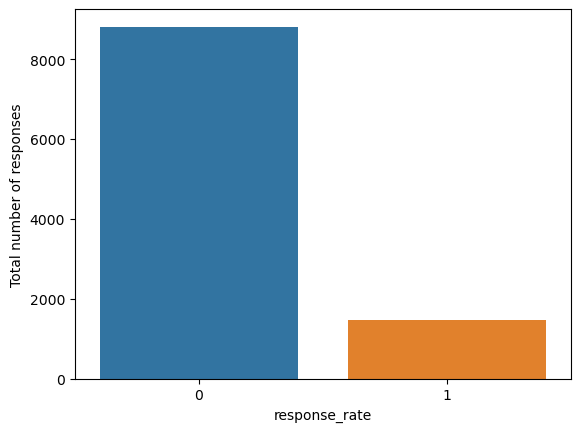

In [33]:
# 3. Show a plot of the total number of responses
sns.countplot(x='response_rate', data=df)
plt.ylabel('Total number of responses')
plt.show()

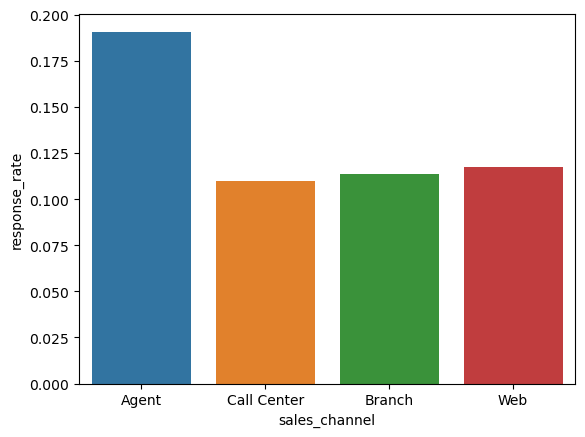

In [34]:
# 4. Show a plot of the response rate by the sales channel
sns.barplot(data=df, x='sales_channel', y='response_rate', ci = None)
plt.show()

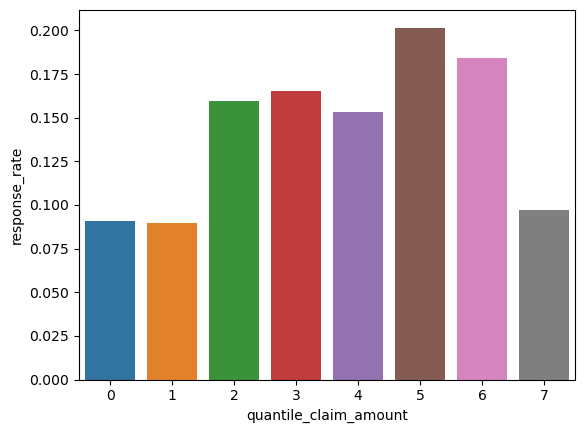

In [35]:
# # 5.Show a plot of the response rate by the total claim amount
# We get too many Bars if we directly create a plot, so we first have to
# get a new structure into the Data, we can sort it by quantiles.
df['quantile_claim_amount'] = pd.qcut(df['total_claim_amount'], 8, labels=False, duplicates = 'drop')
sns.barplot(data=df, x='quantile_claim_amount', y='response_rate', estimator= np.mean, ci=None)
plt.show()

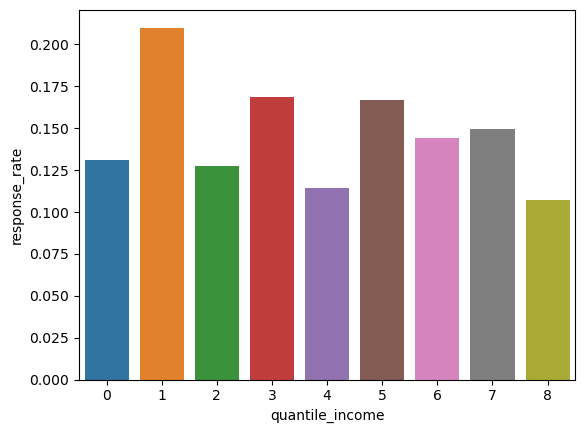

In [36]:
# 6. Show a plot of the response rate by income
df['quantile_income'] = pd.qcut(df['income'], 12, labels=False, duplicates = 'drop')
sns.barplot(data=df, x='quantile_income', y='response_rate', estimator= np.mean, ci=None)
plt.show()
# a lower number of bins shows a quite uniform distribution

## Round 4

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [37]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [38]:
numerical = df.select_dtypes('number')
# for better visibility we drop some values we dont need, like 'month', 'quntile_claim_amount','quantile_income', 'response_rate'
# we created them for analytical purposes earlier
numerical = numerical.drop(['month', 'quantile_claim_amount','quantile_income','response_rate'], axis=1)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [39]:
categoricals = df.select_dtypes('object')
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

Now we will try to check the normality of the numerical variables visually

Use seaborn library to construct distribution plots for the numerical variables

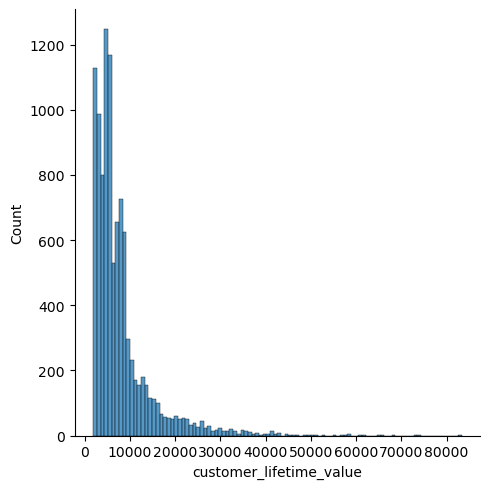

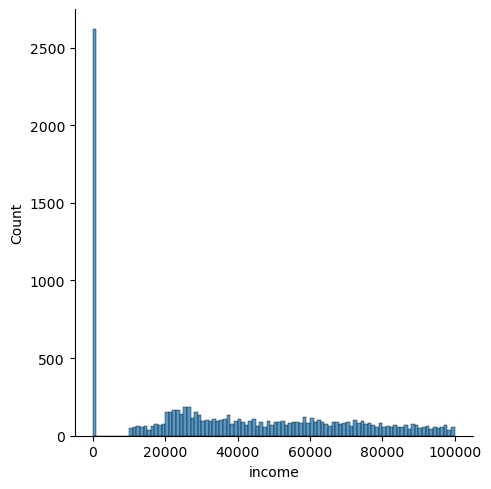

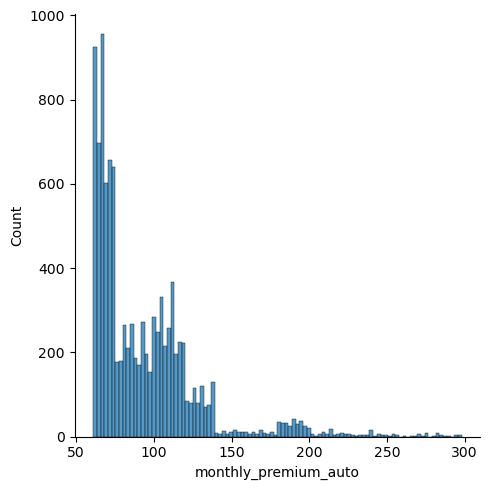

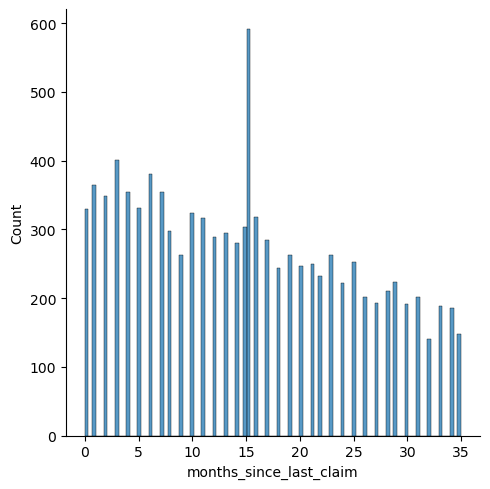

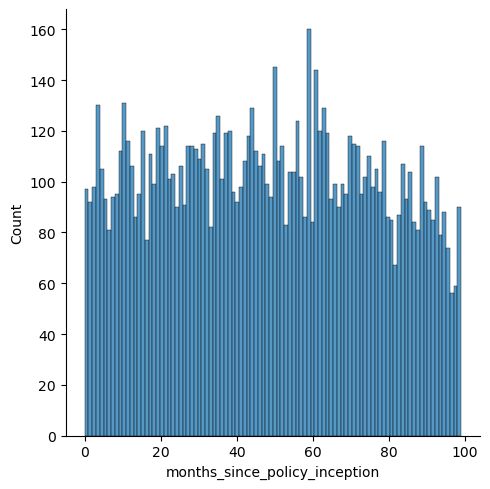

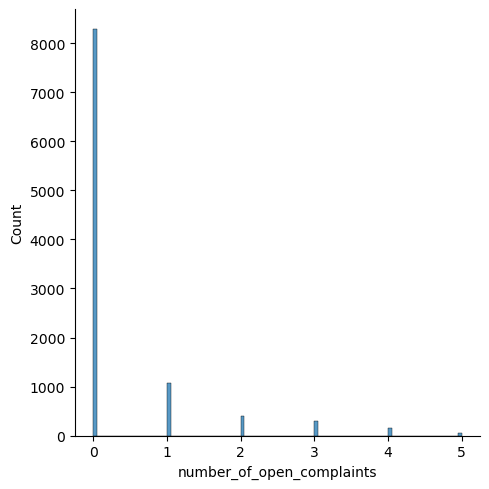

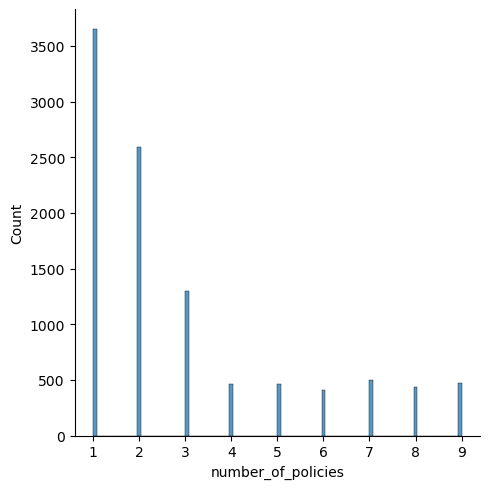

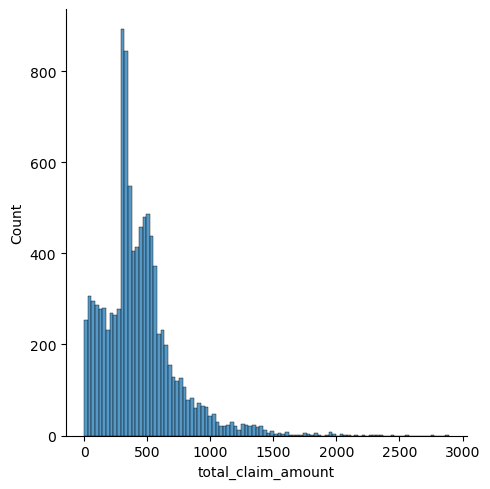

In [40]:
import warnings
warnings.filterwarnings('ignore')

for i in numerical.columns:
    sns.displot(numerical[i], bins = 100)
    plt.show()

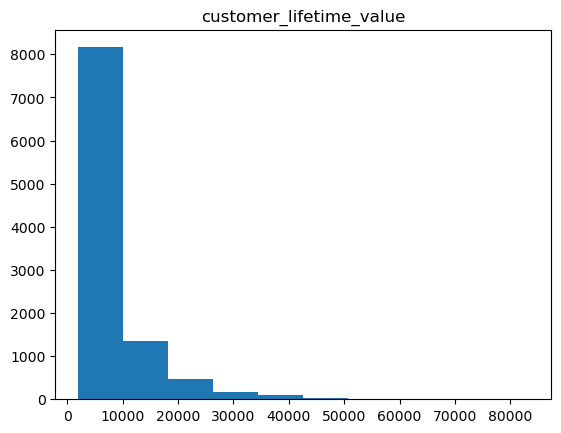

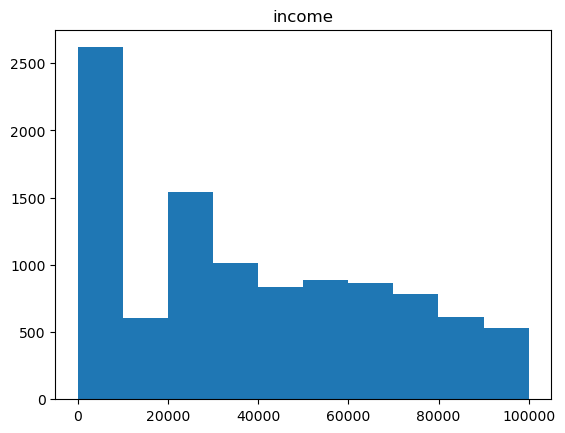

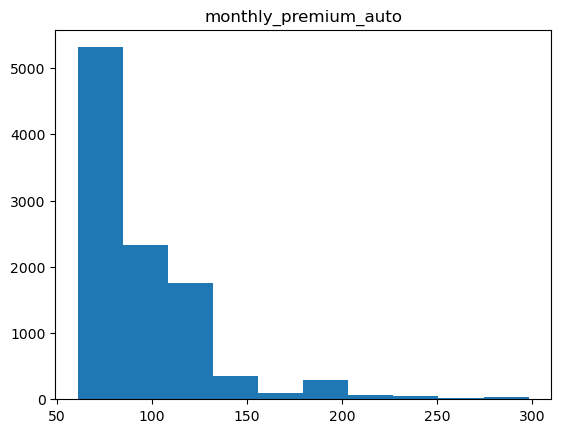

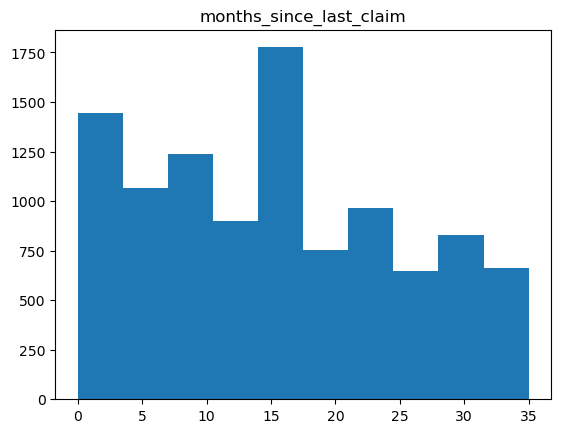

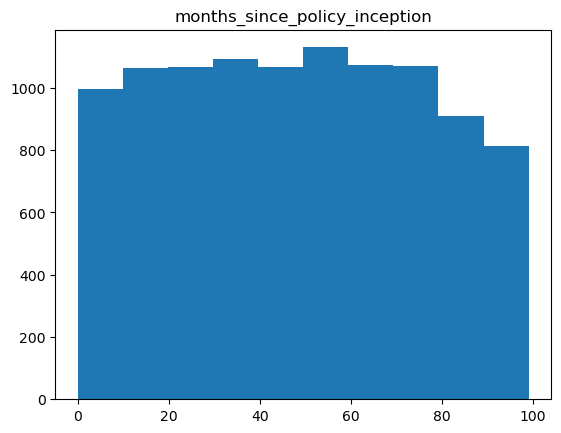

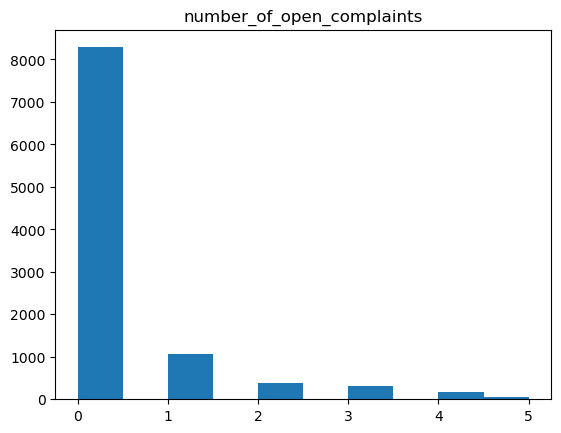

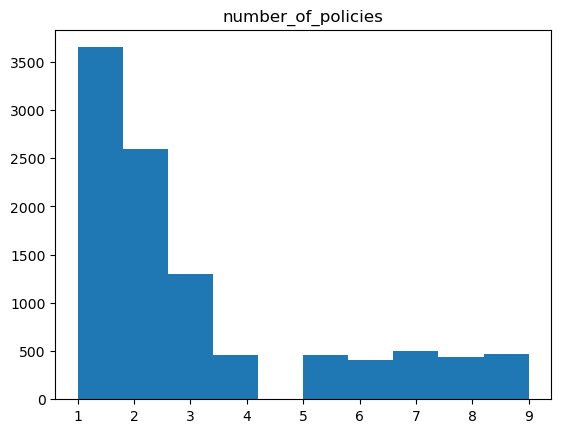

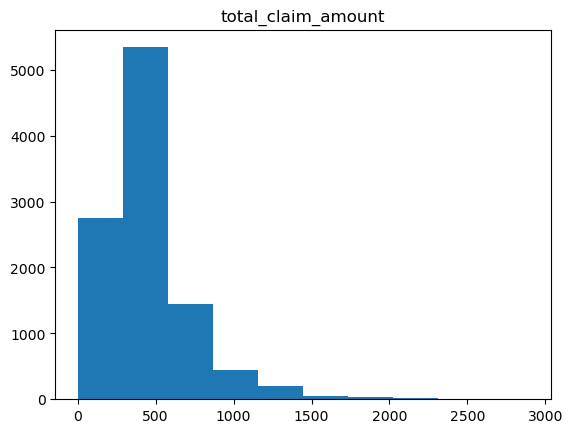

In [41]:
for i in numerical.columns:
    plt.hist(numerical[i])
    plt.title(i)
    plt.show()

Do the distributions for different numerical variables look like a normal distribution

In [42]:
# Few charts look like normal distributions, those that do are:
# Income (apart from the 0 value outliers)
# months_since_policy_inception (thogh very flat)

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [43]:
# Correlation matrix
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.027544,0.403531,0.016091,0.010915,-0.028203,0.016925,0.231934
income,0.027544,1.000000,-0.011783,-0.021209,-0.001657,0.005861,-0.011334,-0.354541
monthly_premium_auto,0.403531,-0.011783,1.000000,0.007417,0.018108,-0.009610,-0.018379,0.631410
months_since_last_claim,0.016091,-0.021209,0.007417,1.000000,-0.038888,0.006171,0.006593,0.010088
months_since_policy_inception,0.010915,-0.001657,0.018108,-0.038888,1.000000,0.001649,-0.012195,0.002423
number_of_open_complaints,-0.028203,0.005861,-0.009610,0.006171,0.001649,1.000000,-0.000179,-0.010603
number_of_policies,0.016925,-0.011334,-0.018379,0.006593,-0.012195,-0.000179,1.000000,-0.009154
total_claim_amount,0.231934,-0.354541,0.631410,0.010088,0.002423,-0.010603,-0.009154,1.000000


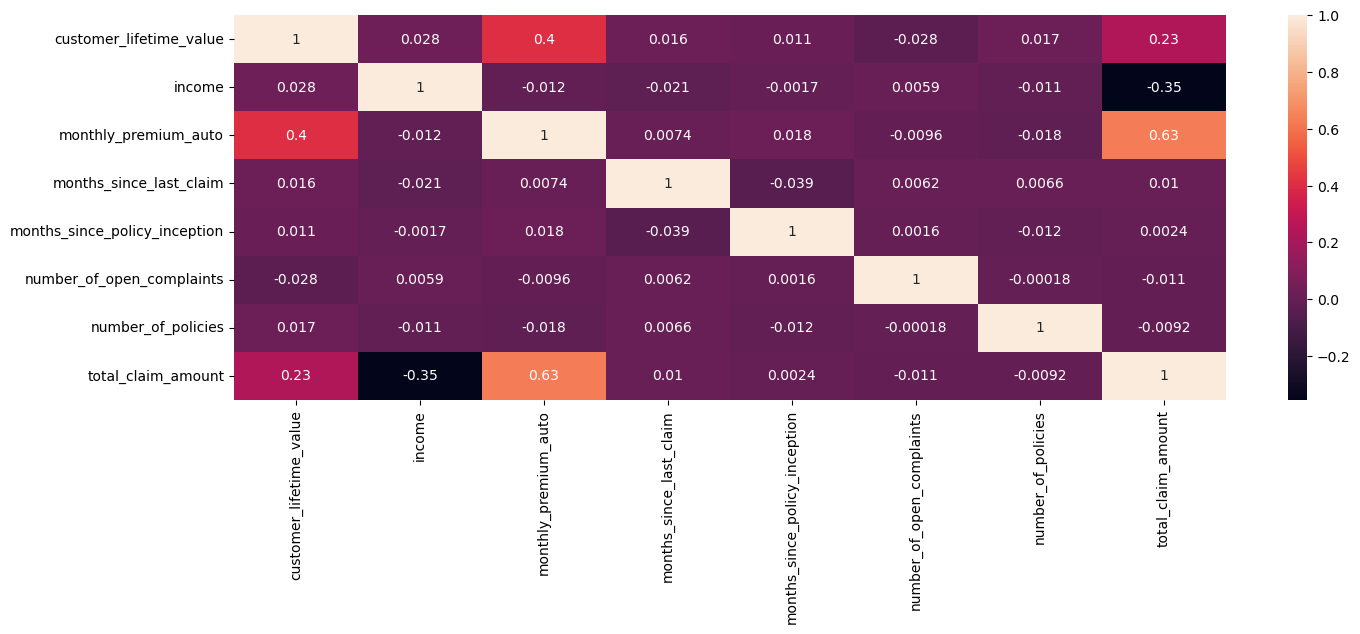

In [44]:
# Heat map
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# There is nothing to drop according to the task, no correlation is anywhere near 0.9

## Round 5

X-y splt

In [45]:
# Setting y to our target
y = df['total_claim_amount']
# Putting everything else to x
X = df.drop(['total_claim_amount'], axis=1)

In [46]:
# Splitting X into numericals and categoricals
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')
print(X_num.columns)
print(X_cat.columns)

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'month',
       'response_rate', 'quantile_claim_amount', 'quantile_income'],
      dtype='object')
Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')


Normalize (numerical)

First we do the MinMaxScaling

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [48]:
# Fitting the data in our transformer
transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)

In [49]:
# To visualize as a dataframe
pd.DataFrame(X_normalized, columns=X_num.columns)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,quantile_claim_amount,quantile_income
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.285714,0.500
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.000000,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.714286,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.714286,0.500
4,0.087527,0.236795,0.236287,0.432281,0.313131,0.0,0.750,0.0,0.0,0.857143,0.125
...,...,...,...,...,...,...,...,...,...,...,...
10274,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,1.0,0.0,1.000000,0.000
10275,0.167823,0.000000,0.810127,0.432281,0.404040,0.0,0.750,0.0,0.0,1.000000,0.000
10276,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0,0.285714,0.625
10277,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0,0.428571,0.375


Now the standard Scaler

In [50]:
# We again fit our data
transformer = StandardScaler().fit(X_num)
x_standardized2 = transformer.transform(X_num)

In [51]:
# Check if it worked
pd.DataFrame(x_standardized2, columns=X_num.columns)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,quantile_claim_amount,quantile_income
0,-0.465525,0.345572,-0.936168,-8.322723e-01,0.138458,-0.406930,2.518140,1.073835,-0.407854,-0.650364,0.353880
1,-0.838622,-1.236998,-0.849070,-1.241762e+00,-0.792754,-0.406930,-0.823181,-0.931242,-0.407854,1.530600,-1.060540
2,1.000251,-0.507511,0.196116,1.931782e+00,-0.613675,-0.406930,-0.405516,1.073835,-0.407854,0.658214,-0.706935
3,2.067849,0.380137,0.109017,-5.251552e-01,-1.616519,-0.406930,-0.405516,-0.931242,2.451856,0.658214,0.353880
4,0.143971,-0.456900,0.689675,1.818499e-16,-0.613675,-0.406930,1.682810,-0.931242,-0.407854,1.094407,-0.706935
...,...,...,...,...,...,...,...,...,...,...,...
10274,1.619100,-1.236998,2.721980,-1.156656e-01,-0.577859,-0.406930,-0.405516,1.073835,-0.407854,1.530600,-1.060540
10275,1.089229,-1.236998,4.638152,1.818499e-16,-0.291332,-0.406930,1.682810,-0.931242,-0.407854,1.530600,-1.060540
10276,-0.400434,0.777781,-0.820037,-8.322723e-01,0.711512,-0.406930,1.265145,-0.931242,-0.407854,-0.650364,0.707485
10277,2.293507,0.075643,3.128441,-4.227828e-01,0.532433,-0.406930,-0.405516,1.073835,-0.407854,-0.214171,0.000275


# Round 6

In [52]:
# We drop some columns of the categoricals because they don't deliver any value
# 'customer' are all unique values that dont generate a pattern
# 'response' because we have response rate in the numericals
# 'effective_to_date' because we use the months
X_cat = X_cat.drop(['customer','response','effective_to_date'], axis = 1)

In [53]:
# For X_num we drop the quentiles we calculated, becaus ethat is already represented in the original datas
X_num = X_num.drop(['quantile_income','quantile_claim_amount'], axis = 1)

In [54]:
# Normaliziong again with the dropped columns
transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)

## OneHot Encoding

In [55]:
# One Hot/Label Encoding categoricals
from sklearn.preprocessing import OneHotEncoder

In [56]:
# OneHotEncoding of the categorical values
encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car', 'unknown_class'], dtype=object), array(['Large', 'Meds

In [57]:
# OneHotEncoding of the categorical values
encoded = encoder.transform(X_cat).toarray()
encoded.shape

(10279, 45)

In [58]:
# Concatenating the normalized and encoded data
# Putting the encoded data into a dataframe to make it possible to concatenate
onehot_encoded = pd.DataFrame(encoded)
X_normalized = pd.DataFrame(X_normalized)

In [59]:
X = pd.concat([X_normalized, onehot_encoded], axis=1)
# See if it worked
X

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.087527,0.236795,0.236287,0.432281,0.313131,0.0,0.750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10275,0.167823,0.000000,0.810127,0.432281,0.404040,0.0,0.750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10276,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10277,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Linear Regression

In [60]:
# Train-test split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Checking the results
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8223, 54)
(2056, 54)
(8223,)
(2056,)


In [62]:
# Training the Linear Regression model with our data
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Model Validation

First we validate the performance on the training data

In [63]:
# Checking for the R2-Score
from sklearn.metrics import r2_score, mean_absolute_error
predictions = lm.predict(X_train)
r2_score(y_train, predictions)
# We achieve an R2-Score of 0.86 for our training data

0.7745615877528619

In [64]:
# Checking for Mean Square Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,predictions)
mse

19087.347843769734

In [65]:
# The Root Mean Square Error is just the root of above
rmse = np.sqrt(mse)
rmse

138.15696813324232

In [66]:
# Lastly the Mean Absolute Error
mae = mean_absolute_error(y_train, predictions)
print(mae)

95.44445002967373


Now we test for performance on the testing data

In [67]:
# Checking for the R2-Score
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)
# R2S went from 0.86 to 0.82

0.755611648976811

In [68]:
# Checking for Mean Square Error
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(y_test, predictions_test)
mse_test
# MSE went from about 12.000 to about 15.500

21639.05016528309

In [69]:
# The Root Mean Square Error is just the root of above
rmse_test = np.sqrt(mse_test)
rmse_test
# RMSE went from about 110 to about 125

147.10217593660226

In [70]:
# Lastly the Mean Absolute Error
mae_test = mean_absolute_error(y_test, predictions_test)
print(mae_test)
# MAE went from about 65 to about 68

97.15625259050526


# Round 7

To make things easier looking forward I summarize the modeling and validation process into a function

In [71]:
# The function takes (a dataframe, a target column name, a float for the test_size between 0 and 1)
# It does:
# X-y split
# Num-Cat split for X
# Normalization using MinMax
# OneHotEncoding for Categroricals
# Concatenation
# Creating and training a linear regression model
# Model Validation
# It outputs: (liner_model, a dataframe containing the valuation metrics for the training and test data)

def linear_automodel_MM(df, target, ts):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import OneHotEncoder
    # X-y split
    y = df[target]
    X = df.drop([target], axis=1)
    # Num-Cat split
    X_num = X.select_dtypes('number')
    X_cat = X.select_dtypes('object')
    # MinMaxScaling
    transformer = MinMaxScaler().fit(X_num)
    X_normalized = transformer.transform(X_num)
    
    # OneHotEncoding
    encoder = OneHotEncoder(drop='first').fit(X_cat)
    encoded = encoder.transform(X_cat).toarray()
    # Putting into dataframes
    onehot_encoded = pd.DataFrame(encoded)
    X_normalized = pd.DataFrame(X_normalized)
    X = pd.concat([X_normalized, onehot_encoded], axis=1)
    # Creating the linear regression model
    # Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)
    # Training the Linear Regression model with our data
    from sklearn import linear_model
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    
    # Validating Model
    # Training Data
    # R2-Score
    from sklearn.metrics import r2_score, mean_absolute_error
    predictions = lm.predict(X_train)
    r2score = r2_score(y_train, predictions)
    
    # Mean Square Error
    from sklearn.metrics import mean_squared_error
    mse=mean_squared_error(y_train,predictions)
    
    # Root Mean Square Error
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error
    mae = mean_absolute_error(y_train, predictions)
    
    # Test Data
    
    # R2-Score
    predictions = lm.predict(X_test)
    r2scoret = r2_score(y_test, predictions)
    
    # Mean Square Error
    mset=mean_squared_error(y_test,predictions)
    
    # Root Mean Square Error
    rmset = np.sqrt(mse)
    
    # Mean Absolute Error
    maet = mean_absolute_error(y_test, predictions)
    
    # Creating the output dataframe
    df_val = pd.DataFrame({'ValType': ['Train', 'Test'], 'R2-Score': [r2score, r2scoret], 'MSE': [mse, mset] , 'RMSE': [rmse, rmset], 'MAE': [mae, maet]})
    
    # returning the model and the validation
    return lm, df_val

In [72]:
# Same as above but with StandardScaling
def linear_automodel_SS(df, target, ts):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import OneHotEncoder
    # X-y split
    y = df[target]
    X = df.drop([target], axis=1)
    # Num-Cat split
    X_num = X.select_dtypes('number')
    X_cat = X.select_dtypes('object')
    # StandardScaling
    transformer = StandardScaler().fit(X_num)
    X_normalized = transformer.transform(X_num)
    
    # OneHotEncoding
    encoder = OneHotEncoder(drop='first').fit(X_cat)
    encoded = encoder.transform(X_cat).toarray()
    # Putting into dataframes
    onehot_encoded = pd.DataFrame(encoded)
    X_normalized = pd.DataFrame(X_normalized)
    X = pd.concat([X_normalized, onehot_encoded], axis=1)
    # Creating the linear regression model
    # Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)
    # Training the Linear Regression model with our data
    from sklearn import linear_model
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    
    # Validating Model
    # Training Data
    # R2-Score
    from sklearn.metrics import r2_score, mean_absolute_error
    predictions = lm.predict(X_train)
    r2score = r2_score(y_train, predictions)
    
    # Mean Square Error
    from sklearn.metrics import mean_squared_error
    mse=mean_squared_error(y_train,predictions)
    
    # Root Mean Square Error
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error
    mae = mean_absolute_error(y_train, predictions)
    
    # Test Data
    
    # R2-Score
    predictions = lm.predict(X_test)
    r2scoret = r2_score(y_test, predictions)
    
    # Mean Square Error
    mset=mean_squared_error(y_test,predictions)
    
    # Root Mean Square Error
    rmset = np.sqrt(mse)
    
    # Mean Absolute Error
    maet = mean_absolute_error(y_test, predictions)
    
    # Creating the output dataframe
    df_val = pd.DataFrame({'ValType': ['Train', 'Test'], 'R2-Score': [r2score, r2scoret], 'MSE': [mse, mset] , 'RMSE': [rmse, rmset], 'MAE': [mae, maet]})
    
    # returning the model and the validation
    return lm, df_val

# Actual start of round 7

In [73]:
# recreating our baseline from round 6
df2 = df.drop(['customer','response','effective_to_date'], axis = 1)
df2 = df2.drop(['quantile_income','quantile_claim_amount'], axis = 1)
lm, validation = linear_automodel_MM(df2,'total_claim_amount',0.2)
validation

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.774562,19087.347844,138.156968,95.444450
1,Test,0.755612,21639.050165,138.156968,97.156253


Trying out the same but StandardScaling instead of MinMax

In [74]:
lm, validation = linear_automodel_SS(df2,'total_claim_amount',0.2)
validation
# Our results are a little worse, but in an insignificant matter

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.774559,19087.553833,138.157714,95.466179
1,Test,0.755709,21630.408573,138.157714,97.159652


### We try our model with different ratios of train test split

In [75]:
lm, validation = linear_automodel_MM(df2,'total_claim_amount',0.1)
validation

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.772743,19520.057724,139.7142,96.228558
1,Test,0.752576,20113.377601,139.7142,93.816599


In [76]:
lm, validation = linear_automodel_MM(df2,'total_claim_amount',0.3)
validation

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.775908,18830.932197,137.225844,95.230833
1,Test,0.758321,21444.877478,137.225844,97.029522


In [77]:
lm, validation = linear_automodel_MM(df2,'total_claim_amount',0.5)
validation

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.777792,18421.609613,135.72623,93.488367
1,Test,0.761936,20942.319897,135.72623,97.284364


In [78]:
lm, validation = linear_automodel_MM(df2,'total_claim_amount',0.8)
validation

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.783252,18267.683272,135.157994,93.884689
1,Test,0.758092,20738.522652,135.157994,98.067843


For lower training sizes we see improving performance on the training data.
For the test data the improvement stops roughly at a 50/50 split, for our sample size this seems to be the best we can get for now.

### We remove some outliers in the data for income and total_claim_amount

In [79]:
# We see a large number of 0 for income, which doesn't make sense, we will remiove them
# Since income has a noticeable correlation "-0.35" with our target, I decided against inserting a value into this column and
# opted for the nuclear option

In [80]:
dfo = df2[(df['income']>0)].copy()
dfo.shape
# Check if it worked

(7661, 24)

Testing our model with the new dataframe

In [81]:
lm, validation = linear_automodel_SS(dfo,'total_claim_amount',0.3)
validation
# Conclusion: Our validation metrics significantly improved, we will continue with the dfo dataframe

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.805950,12702.222150,112.704135,75.230400
1,Test,0.791105,12599.223839,112.704135,77.383847


In [82]:
# Now we remove the outliers for total_claim_amount which start at above 2500
dfo = dfo[(df['total_claim_amount']<2500)].copy()
dfo.shape

(7658, 24)

In [83]:
lm, validation = linear_automodel_SS(dfo,'total_claim_amount',0.3)
validation
# We only lost 3 rows but noticeably improved the model

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811645,11621.609955,107.803571,74.532891
1,Test,0.807562,11986.710808,107.803571,75.185177


### Use the transformation on numerical columns which align it more towards a normal distribution

Log10 transformation

In [84]:
# We will convert the numerical data with a log10 transformation and see the impact
# We use this function
def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [85]:
dfol = dfo.copy()

In [86]:
# We apply the log transformastion to all numerical columns
for c in dfol.columns:
    if c in dfol.select_dtypes(['number']):
        dfol[c] = dfol[c].apply(log_transfom_clean)

In [87]:
# Inspecting the result
lm, validation = linear_automodel_SS(dfol,'total_claim_amount',0.2)
validation
# Our R2 deteriorated massively.
# All other metrics decreased by several magnitudes. This is obviously partially due to the smaller numbers after the transformation.
# We will consider the dfo and dfol dataframes

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.714585,0.048138,0.219403,0.123415
1,Test,0.721041,0.046208,0.219403,0.120252


 ## Removing insignificant variables

We try out what effect the removal of different columns has on our model:

In [88]:
# We drop each column once and check the results
dfod = dfo.copy()
for c in dfod.columns:
    if c != 'total_claim_amount':
        dtest = dfod.copy()
        dtest = dtest.drop([c], axis=1)
        lm, validation = linear_automodel_SS(dtest,'total_claim_amount',0.3)
        print('Results for dropping ' + c)
        display(validation)    

Results for dropping state


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811497,11630.709533,107.845767,74.548663
1,Test,0.807668,11980.069900,107.845767,75.151547


Results for dropping customer_lifetime_value


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.81147,11632.381123,107.853517,74.57512
1,Test,0.80766,11980.613672,107.853517,75.22820


Results for dropping coverage


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.810958,11663.966090,107.999843,74.696563
1,Test,0.808065,11955.348523,107.999843,75.305745


Results for dropping education


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811337,11640.590428,107.891568,74.607458
1,Test,0.808064,11955.422261,107.891568,75.151533


Results for dropping employmentstatus


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811458,11633.100311,107.856851,74.505571
1,Test,0.807045,12018.885620,107.856851,75.191434


Results for dropping gender


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811466,11632.644619,107.854739,74.540488
1,Test,0.806931,12026.006073,107.854739,75.261418


Results for dropping income


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811032,11659.41113,107.978753,74.576199
1,Test,0.806703,12040.22589,107.978753,75.337586


Results for dropping location_code


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.489138,31520.428689,177.539935,130.327556
1,Test,0.495881,31400.862105,177.539935,130.693690


Results for dropping marital_status


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811351,11639.713849,107.887506,74.522760
1,Test,0.807489,11991.266477,107.887506,75.164491


Results for dropping monthly_premium_auto


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.773945,13947.704729,118.100401,81.121124
1,Test,0.770003,14326.215528,118.100401,81.663246


Results for dropping months_since_last_claim


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811554,11627.188319,107.829441,74.545230
1,Test,0.807503,11990.363013,107.829441,75.181489


Results for dropping months_since_policy_inception


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811638,11622.040916,107.80557,74.530651
1,Test,0.807550,11987.463185,107.80557,75.183013


Results for dropping number_of_open_complaints


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811624,11622.857424,107.809357,74.516986
1,Test,0.807504,11990.311388,107.809357,75.216450


Results for dropping number_of_policies


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811637,11622.093519,107.805814,74.542439
1,Test,0.807690,11978.728712,107.805814,75.157650


Results for dropping policy_type


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811645,11621.609955,107.803571,74.532891
1,Test,0.807562,11986.710808,107.803571,75.185177


Results for dropping policy


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811404,11636.425248,107.872264,74.601925
1,Test,0.807344,12000.308546,107.872264,75.168993


Results for dropping renew_offer_type


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811303,11642.678044,107.901242,74.631616
1,Test,0.807076,12016.972750,107.901242,75.238909


Results for dropping sales_channel


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811520,11629.321258,107.839331,74.553262
1,Test,0.807639,11981.880160,107.839331,75.195677


Results for dropping vehicle_class


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.809794,11735.803568,108.331914,75.006444
1,Test,0.807020,12020.462225,108.331914,75.764411


Results for dropping vehicle_size


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811626,11622.726354,107.808749,74.545846
1,Test,0.807479,11991.845184,107.808749,75.218164


Results for dropping vehicle_type


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811539,11628.122280,107.833772,74.561740
1,Test,0.807732,11976.097487,107.833772,75.131732


Results for dropping month


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811596,11624.576080,107.817327,74.521435
1,Test,0.807598,11984.458338,107.817327,75.163571


Results for dropping response_rate


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.811596,11624.630461,107.81758,74.561792
1,Test,0.807569,11986.270112,107.81758,75.139189


In [107]:
# The labels with the highest impact are:
# 'location code'
# 'monthly_premium_auto'

# We try our model just with these columns:
dfreduced = dfo[['location_code','monthly_premium_auto','total_claim_amount']].copy()
lm, validationf = linear_automodel_SS(dfreduced,'total_claim_amount',0.3)
validationf

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.806076,11965.204991,109.385579,75.606174
1,Test,0.805541,12112.610504,109.385579,75.967279


In [108]:
# And with our log10 adjusted data:
dfreduced = dfol[['location_code','monthly_premium_auto','total_claim_amount']].copy()
lm, validationf2 = linear_automodel_SS(dfreduced,'total_claim_amount',0.3)
validationf2

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.706688,0.050777,0.225337,0.125568
1,Test,0.731705,0.041899,0.225337,0.120310


In [91]:
# With just tweo labels left there is no need to search for further multicollinearity
# Trying out the 50/50 train test split from earlier doesn't imrpove our results anymore.

In [92]:
# The best I can achieve are models that:
# Take only the labels 'location_code' and 'monthly_premium_auto'
# They require very little information and return passable results!
# When using new data we can see if the lowered MSE RMSE and MAE from the log10 transformation outweigh the R2-Score

# Final round

### Further data exploration

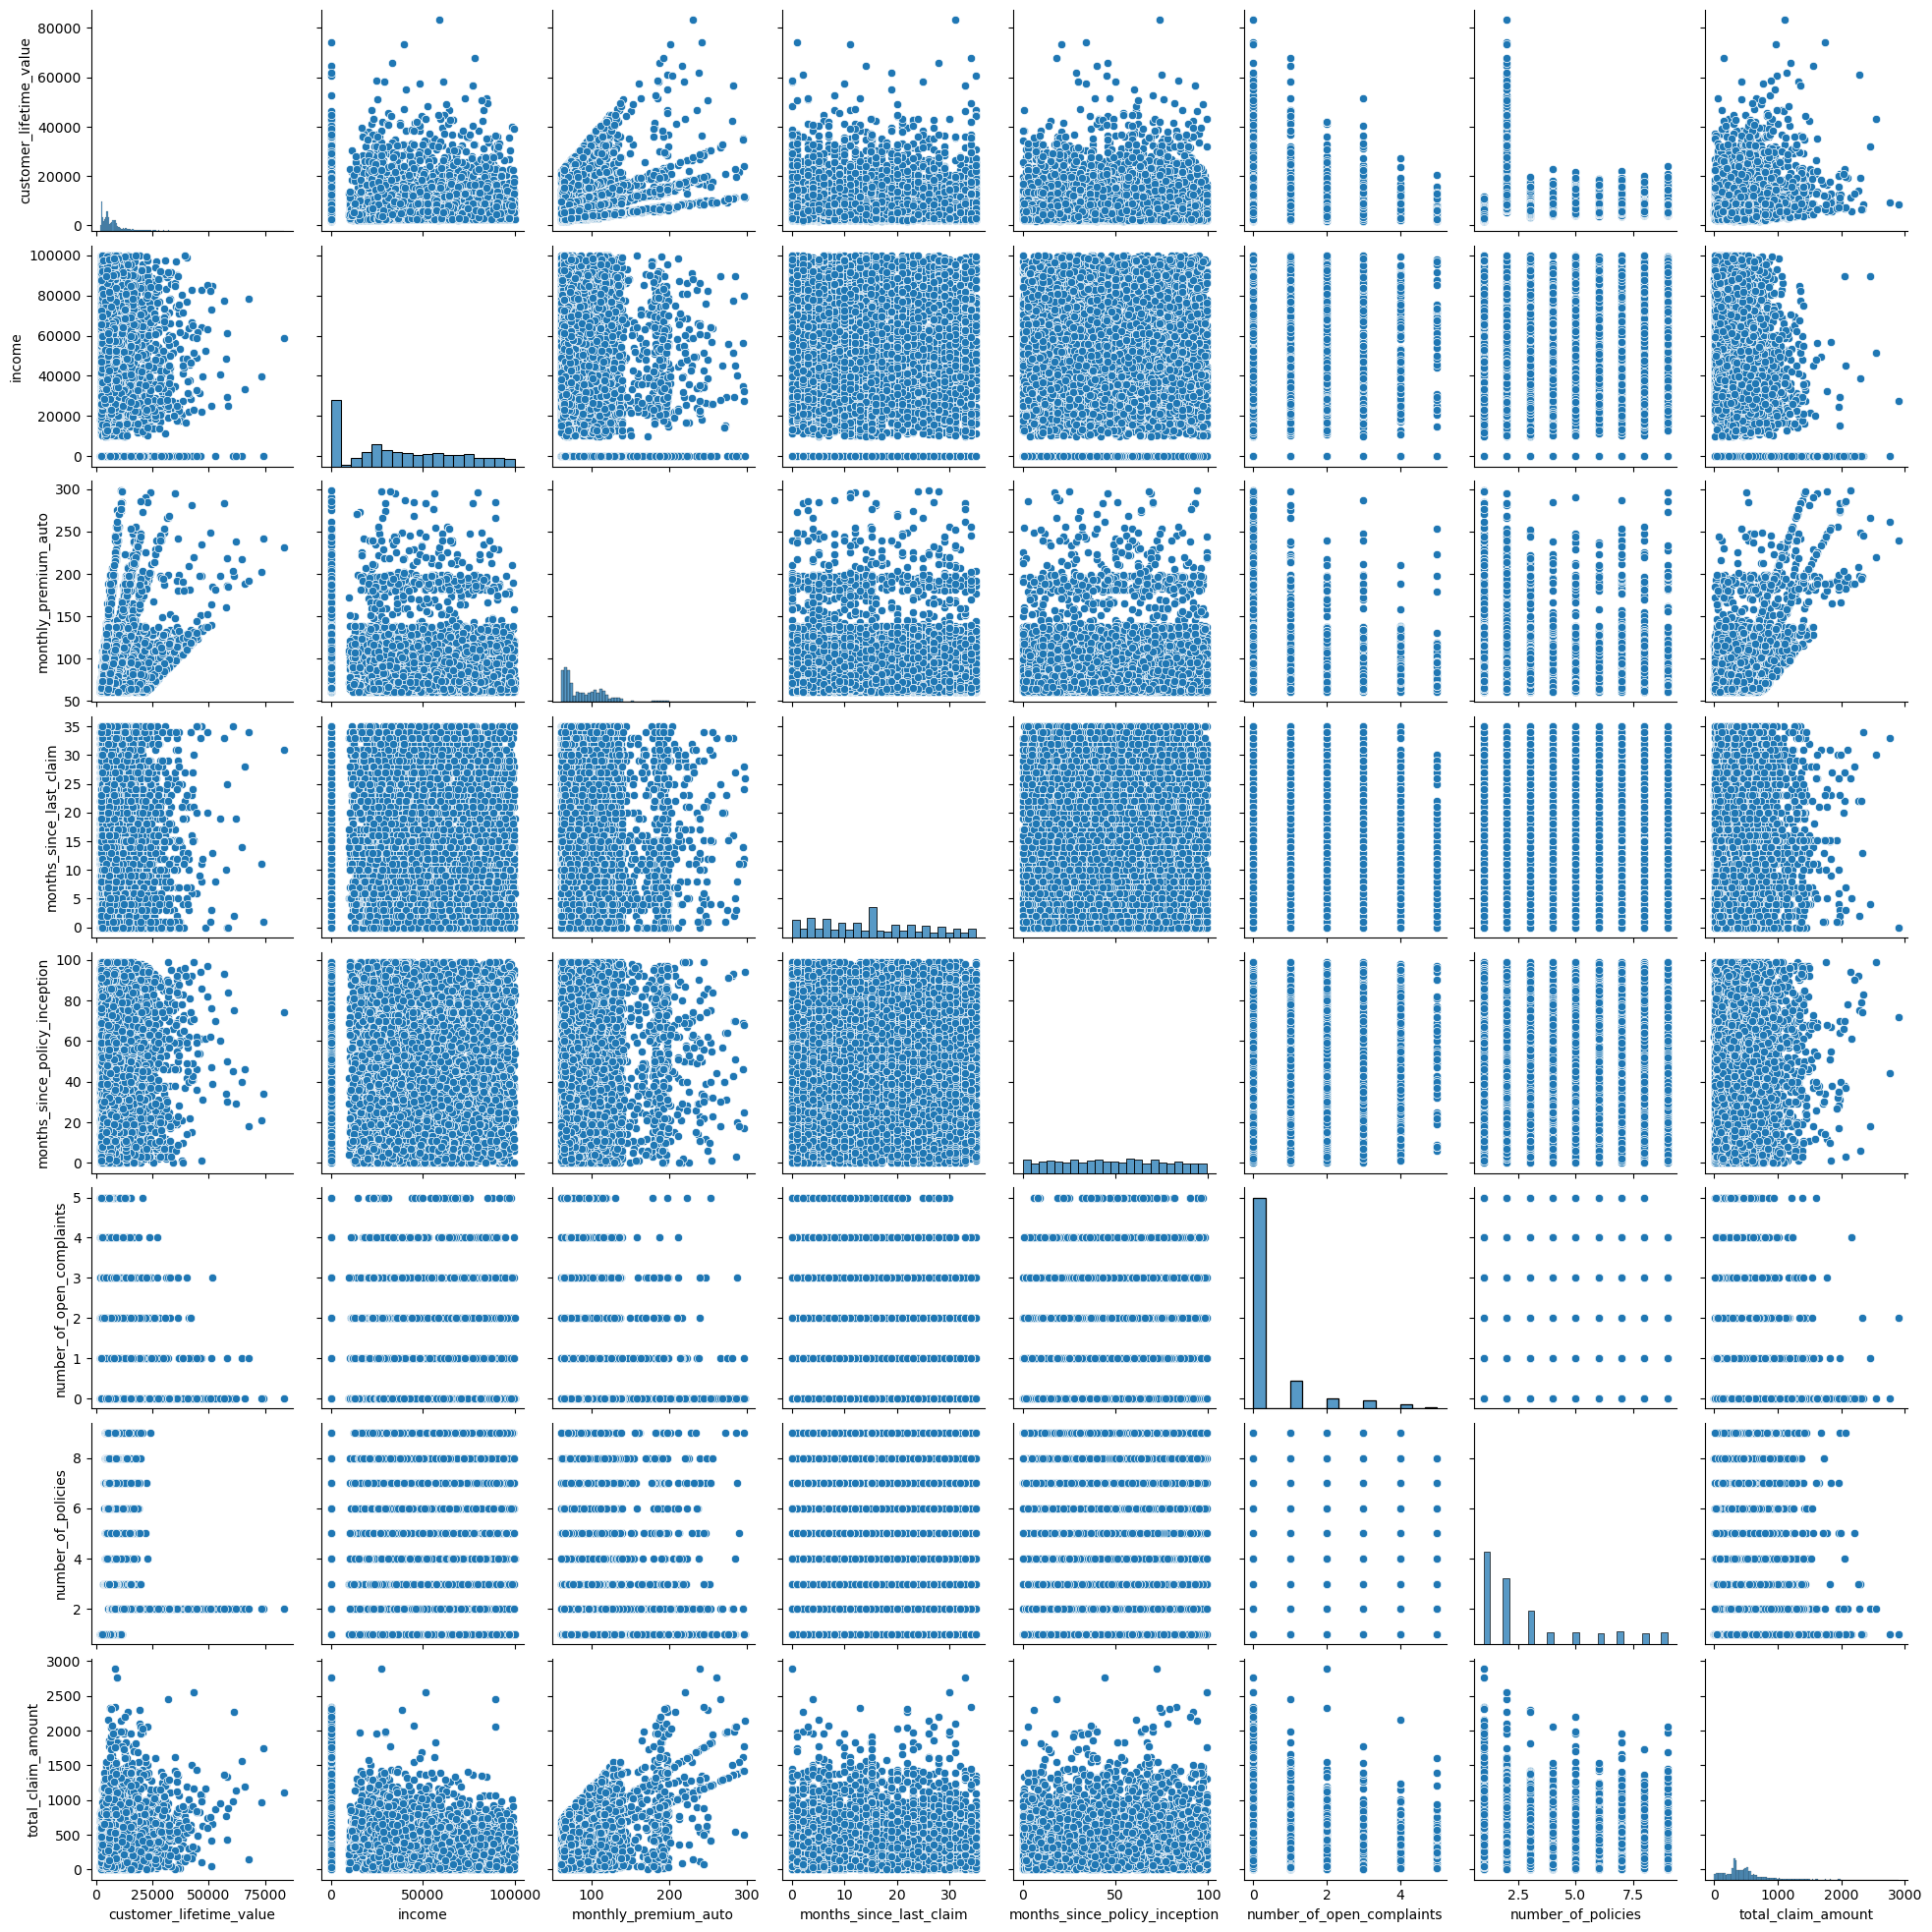

In [100]:
sns.pairplot(numerical)
# By visual inspection we see the same correlations as when building the model

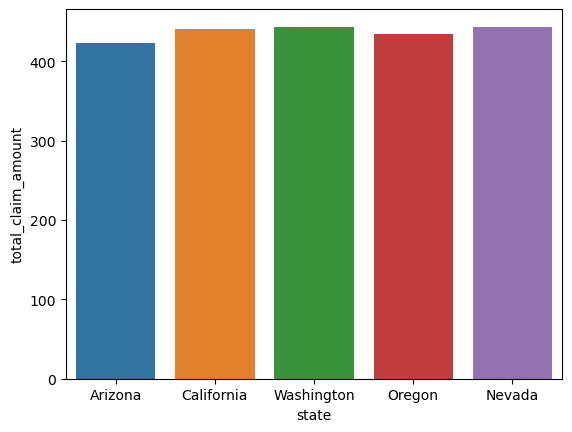

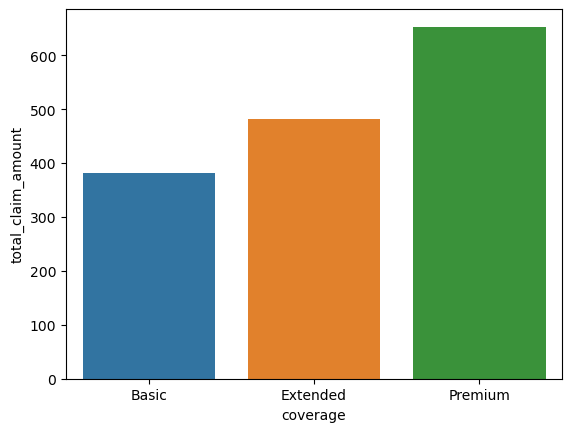

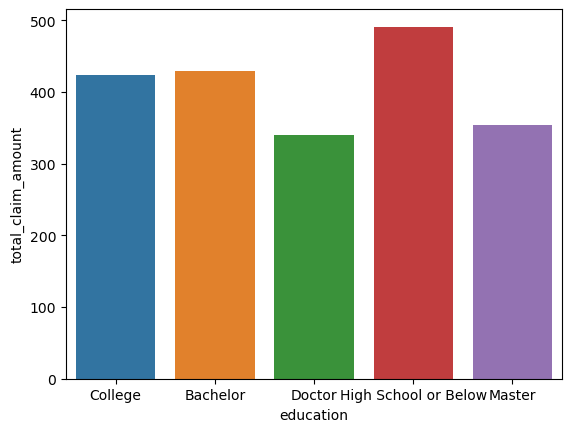

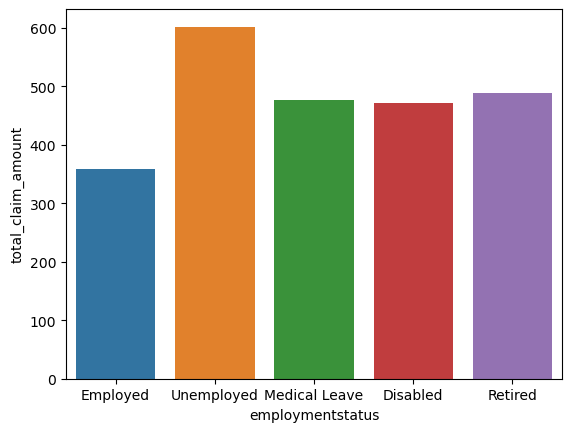

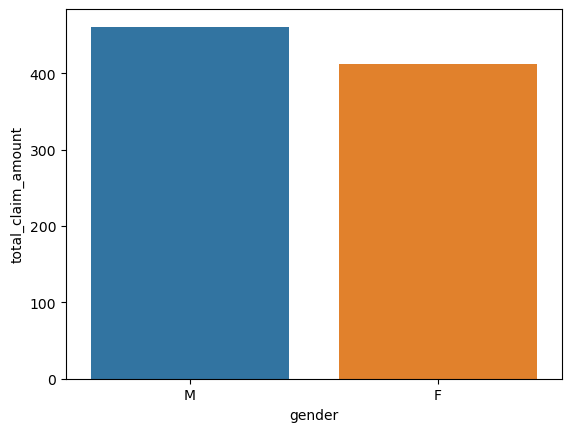

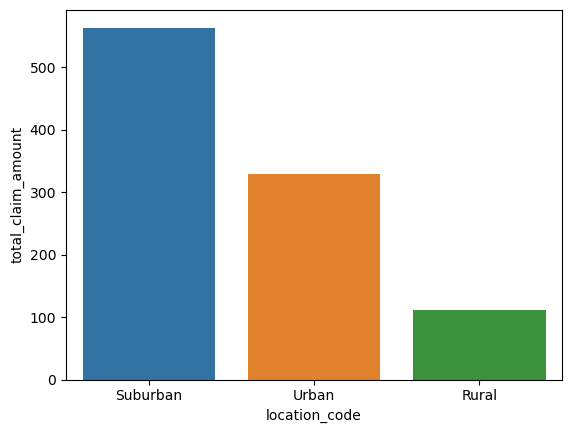

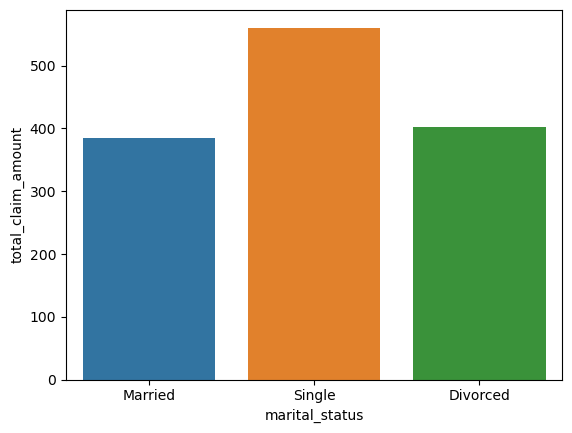

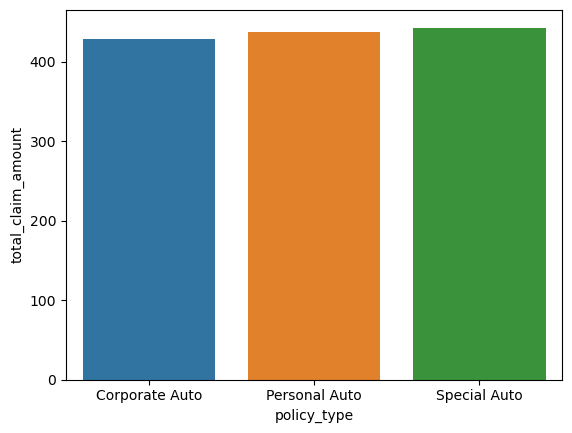

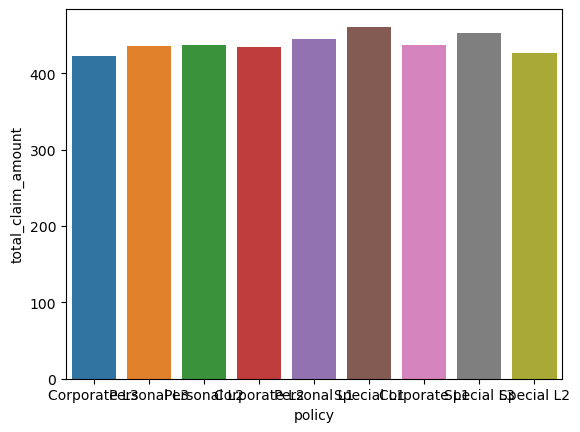

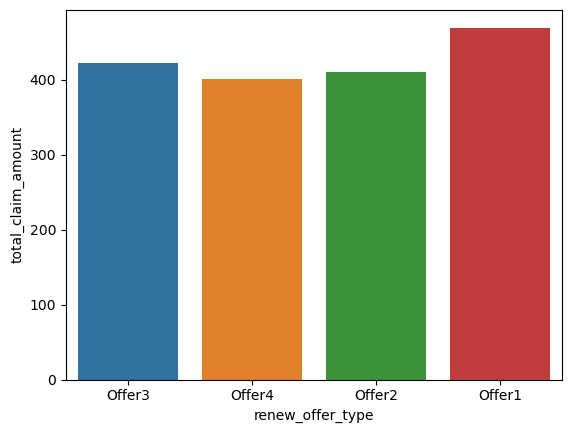

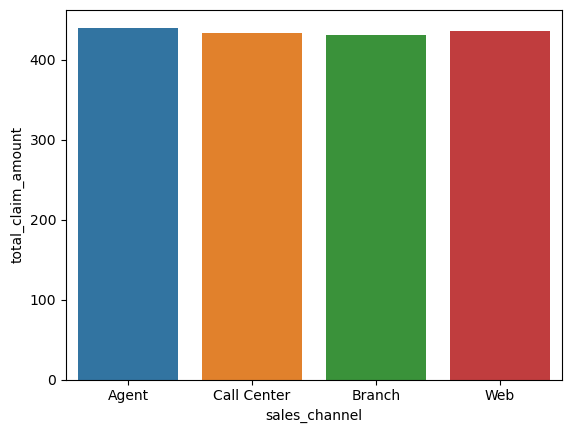

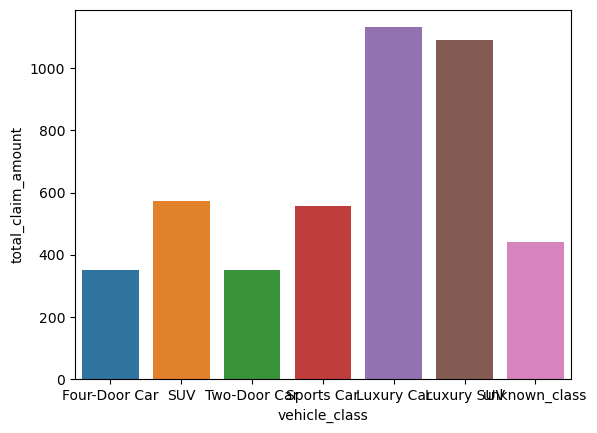

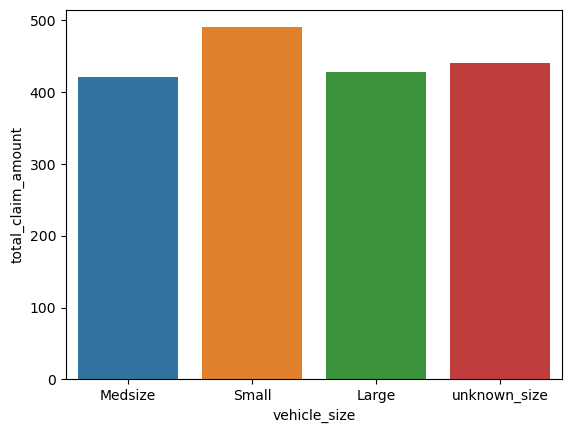

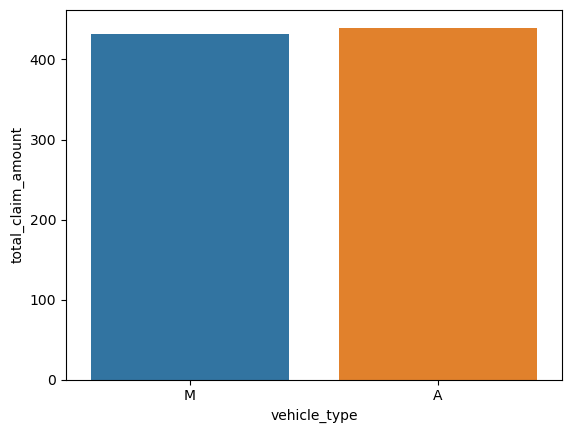

In [104]:
# Checking for effects in the categorical data
for i in ['state', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']:
    sns.barplot(data=df, x= i, y='total_claim_amount', estimator= np.mean, ci=None)
    plt.show()

# Results

### Data quality

There seems to be a problem with the data collection for the transmission type. All data for manual transmission contained NULL values and had to be replaced.
Also a lot of incomes are registered as 0, which does not make any sense and implies wrong entries.

### Very few correlations with other numerical data

We found that in our dataset our target had very few correlations with other variables in the numerical Data, the only relevant factors seem to be the location code and the monthly premium.

When building our model the dropping of any of the categorical columns did not yield in diminishing returns.

### Model

With only two categories of our dataset we were able to produce a satisfactory model with the following metrics:

In [110]:
display('With normalized data:', validationf, 'With log10 transformed and normalized data:',validationf2)

'With normalized data:'

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.806076,11965.204991,109.385579,75.606174
1,Test,0.805541,12112.610504,109.385579,75.967279


'With log10 transformed and normalized data:'

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.706688,0.050777,0.225337,0.125568
1,Test,0.731705,0.041899,0.225337,0.120310


### Other factors

We see that the total claim amount is higher for higher coverages, what is not surprising.

<AxesSubplot:xlabel='coverage', ylabel='total_claim_amount'>

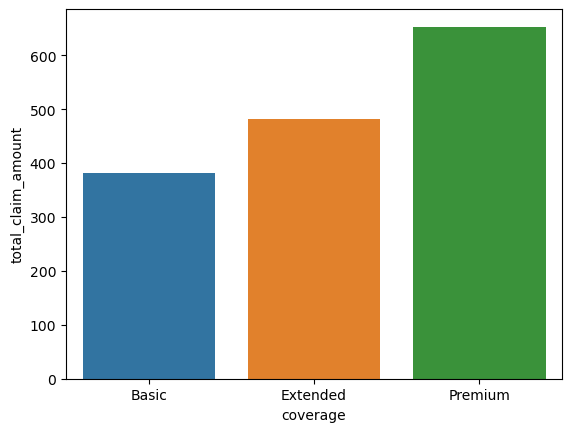

In [111]:
sns.barplot(data=df, x= 'coverage', y='total_claim_amount', estimator= np.mean, ci=None)

We see diminishing claim amounts for higher education individuals.

<AxesSubplot:xlabel='education', ylabel='total_claim_amount'>

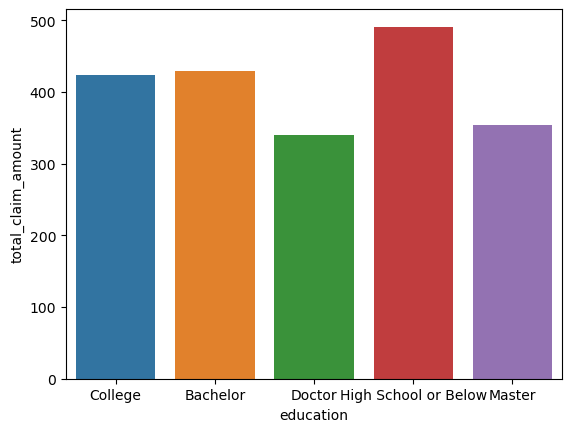

In [112]:
sns.barplot(data=df, x= 'education', y='total_claim_amount', estimator= np.mean, ci=None)

Employed customers have less claim amounts then unemployed.

<AxesSubplot:xlabel='employmentstatus', ylabel='total_claim_amount'>

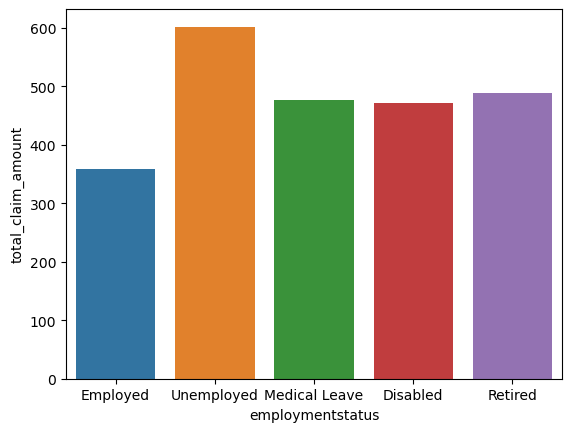

In [114]:
sns.barplot(data=df, x= 'employmentstatus', y='total_claim_amount', estimator= np.mean, ci=None)

Claim amounts for male customers are slightly higher than for females.

<AxesSubplot:xlabel='gender', ylabel='total_claim_amount'>

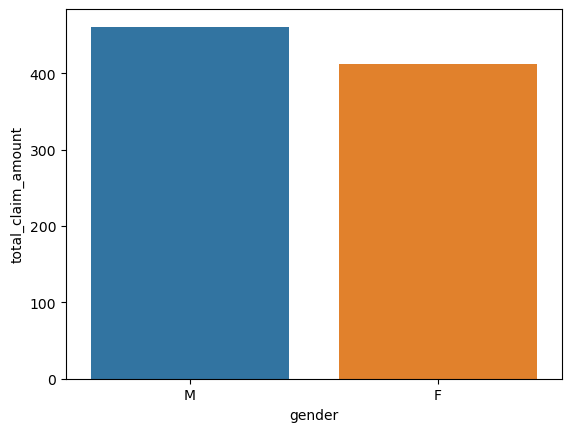

In [115]:
sns.barplot(data=df, x= 'gender', y='total_claim_amount', estimator= np.mean, ci=None)

We see a the highest average claim for suburban customers. Rural customers are having the smallest claims.
The differences here are huge, with Suburban averages being more than 4 times the Rural averages.

Suburban    6519
Rural       1993
Urban       1767
Name: location_code, dtype: int64


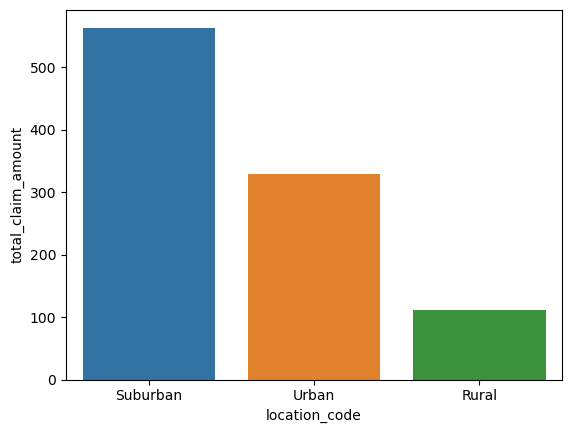

In [126]:
sns.barplot(data=df, x= 'location_code', y='total_claim_amount', estimator= np.mean, ci=None)
print(df['location_code'].value_counts())

We see higher claim amounts for single customers in relation to married or divorced ones.

<AxesSubplot:xlabel='marital_status', ylabel='total_claim_amount'>

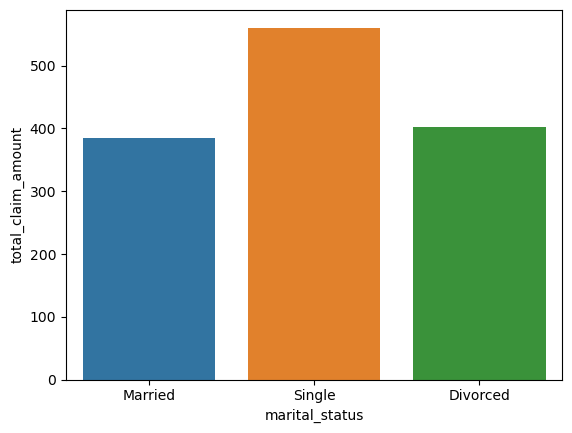

In [118]:
sns.barplot(data=df, x= 'marital_status', y='total_claim_amount', estimator= np.mean, ci=None)

We see spikes in the claim amounts for luxury cars and luxury SUVs

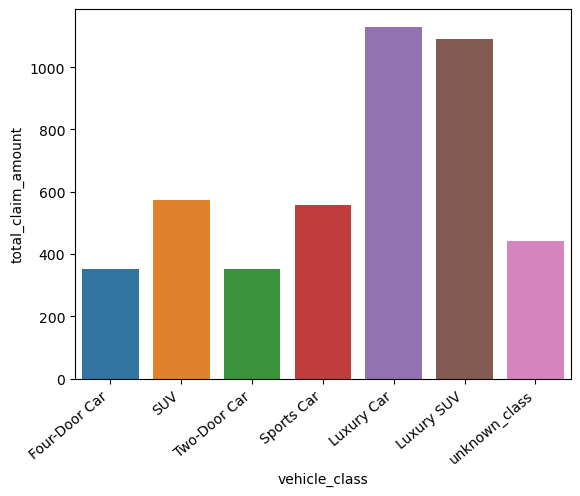

In [122]:
ax = sns.barplot(data=df, x= 'vehicle_class', y='total_claim_amount', estimator= np.mean, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

## Conclusion

More than 50% of the customers reside in suburban areas which tend to vastly higher claim amounts.

Actions in marketing to target rural population would result in a customer base with significantly lower claims.
This could considerably improve financial performance.